## 음식점의 종류, 가격, 위치, 인구 분석

In [1]:
import numpy as np
import pandas as pd

In [2]:
restaurant_df = pd.read_csv('대전광역시 대덕구_일반음식점_20210101.csv', header = 0, engine = 'python', encoding='ANSI')
restaurant_price_df = pd.read_csv('대전광역시 대덕구_개인서비스가격정보_20210630.csv', header = 0, engine = 'python', encoding='ANSI')
people_df = pd.read_csv('대전광역시 대덕구_주민등록인구현황_20210630.csv', header = 0, engine = 'python', encoding='ANSI')

In [3]:
restaurant_df.head()

,업소명,업종명,업태명,소재지(도로명),소재지(지번),인허가일자,데이터기준일자
0,영화반점,일반음식점,중국식,"대전광역시 대덕구 신탄진동로23번길 46 (신탄진동,(1층))",대전광역시 대덕구 신탄진동 139번지 17호 (1층),1971-03-29,2021-01-01
1,대덕식당,일반음식점,한식,대전광역시 대덕구 신탄진로738번길 1 (신탄진동),대전광역시 대덕구 신탄진동 295번지 14호,1976-11-15,2021-01-01
2,홍성식당,일반음식점,한식,"대전광역시 대덕구 신탄진로839번길 10, 1층 (신탄진동)",대전광역시 대덕구 신탄진동 114번지 14호 1층,1977-01-31,2021-01-01
3,우리식당,일반음식점,한식,대전광역시 대덕구 대화1길 6 (대화동),대전광역시 대덕구 대화동 35번지 6호,1977-06-21,2021-01-01
4,등나무집,일반음식점,한식,대전광역시 대덕구 대화로 53 (대화동),대전광역시 대덕구 대화동 40번지 67호,1978-11-24,2021-01-01


In [4]:
restaurant_price_df.head()

,품목,조사기준,구평균가격,오정동,대화동,회덕동,비래동,송촌동,중리동,"법1,2동",신탄진동,"석봉,목상동",덕암동,데이터기준일자
0,설렁탕,1그릇(대중식당),6800.0,6000.0,NaN,NaN,NaN,8000.0,7000.0,6000.0,NaN,7000,NaN,2021-06-30
1,냉면,1그릇(대중식당),6850.0,8500.0,5000.0,7000.0,7000.0,8000.0,6000.0,6000.0,7000.0,7000,7000.0,2021-06-30
2,비빔밥,1그릇(대중식당),6000.0,6000.0,6000.0,NaN,NaN,7000.0,4500.0,6000.0,7000.0,6000,5500.0,2021-06-30
3,갈비탕,1그릇(대중식당),9400.0,10000.0,6000.0,9000.0,10000.0,12000.0,8000.0,9000.0,10000.0,10000,10000.0,2021-06-30
4,삼계탕,1그릇(대중식당),11300.0,12000.0,10000.0,10000.0,12000.0,12000.0,12000.0,10000.0,12000.0,11000,12000.0,2021-06-30


In [5]:
address_dong=['대덕구','오정동','대화동','회덕동','비래동','송촌동','중리동','법1동','법2동','신탄진동','석봉동','덕암동','목상동']

In [6]:
address_count_dong=[0 for i in range(13)]

def Address_Count(dong):
    for i in range(0, 13):
        if(dong == address_dong[i]):
            address_count_dong[i]=address_count_dong[i]+1
            break

def Address_dong(list1):
    address=[]
    re_address=[]
    for temp in list1:
        #print('전처리전',temp)
        address=temp.split(' ')
        #print('전처리후',address[2])
        re_address.append(address[2])
        Address_Count(address[2])
    #print(re_address)
    return(re_address)
            
restaurant_df['주소(동)']=Address_dong(restaurant_df['소재지(지번)'])
address_count_dong[0]= sum(address_count_dong)
print(address_count_dong)

[2041, 305, 96, 0, 187, 368, 474, 0, 0, 246, 175, 95, 95]


In [7]:
people_df['식당수']=pd.DataFrame(address_count_dong)
people_df = people_df.drop(['구분','데이터기준일자'], axis = 1, inplace = False)
people_df

,세대수,인구수(남),인구수(여),10대이하,20대,30대,40대,50대,60대,70대,65세이상,식당수
0,89155,86005,78753,26994,24313,19798,26588,33251,25794,18422,28698,2041
1,7741,6794,7526,1596,2274,1538,1918,2701,2642,1866,2935,305
2,3757,3345,3535,768,801,821,1054,1329,1350,979,1562,96
3,6368,6141,5699,1626,1440,1227,1739,2333,2301,1843,2804,0
4,8183,8215,7002,2564,2248,1581,2510,3162,2532,1801,2846,187
5,13666,13906,10387,5749,4038,2678,4909,5551,2822,1825,2821,368
6,10173,9399,10183,2506,2996,2202,2989,3734,3071,2074,3250,474
7,6301,6986,6032,1885,1743,1618,1729,2616,2083,1613,2482,0
8,7917,8267,6883,2433,2192,1494,2272,3264,2717,1812,2858,0
9,5645,5380,5271,1363,1468,1100,1498,2150,1875,1571,2403,246


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X,Y 분활하기
Y=people_df['식당수']
X=people_df.drop(['식당수'], axis=1,inplace=False)

#훈련용 데이터와 평가용 데이터 분활하기
X_trian, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=156)

#선형 회귀 분석: 모델 생성
lr=LinearRegression()

lr.fit(X_trian, Y_train)

Y_predict=lr.predict(X_test)


In [9]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 265894.069, RMSE : 515.649
R^2(Variance score) : 0.636


In [10]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  -76.80880965146548
회귀 계수 값:  [ 0.1 -0.1  0.1  0.1 -0.1 -0.2 -0.  -0.   0.4 -0.3 -0.2]


In [11]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

60대       0.43
인구수(여)    0.15
10대이하     0.12
세대수       0.06
40대      -0.01
50대      -0.02
인구수(남)   -0.11
20대      -0.14
30대      -0.18
65세이상    -0.21
70대      -0.26
dtype: float64

In [12]:
people_df

,세대수,인구수(남),인구수(여),10대이하,20대,30대,40대,50대,60대,70대,65세이상,식당수
0,89155,86005,78753,26994,24313,19798,26588,33251,25794,18422,28698,2041
1,7741,6794,7526,1596,2274,1538,1918,2701,2642,1866,2935,305
2,3757,3345,3535,768,801,821,1054,1329,1350,979,1562,96
3,6368,6141,5699,1626,1440,1227,1739,2333,2301,1843,2804,0
4,8183,8215,7002,2564,2248,1581,2510,3162,2532,1801,2846,187
5,13666,13906,10387,5749,4038,2678,4909,5551,2822,1825,2821,368
6,10173,9399,10183,2506,2996,2202,2989,3734,3071,2074,3250,474
7,6301,6986,6032,1885,1743,1618,1729,2616,2083,1613,2482,0
8,7917,8267,6883,2433,2192,1494,2272,3264,2717,1812,2858,0
9,5645,5380,5271,1363,1468,1100,1498,2150,1875,1571,2403,246


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 4)
x_features = ['세대수', '인구수(남)', '인구수(여)', '10대이하', '20대', '30대', '40대', '50대', '60대', '70대', '65세이상']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    plt.rc('font', family='Malgun Gothic')
    plt.rc('axes', unicode_minus=False)
    sns.regplot(x = feature, y = '식당수', data = people_df, ax = axs[row][col])

C:\Users\ekdms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ekdms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ekdms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ekdms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ekdms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ekdms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49688 missing from curre

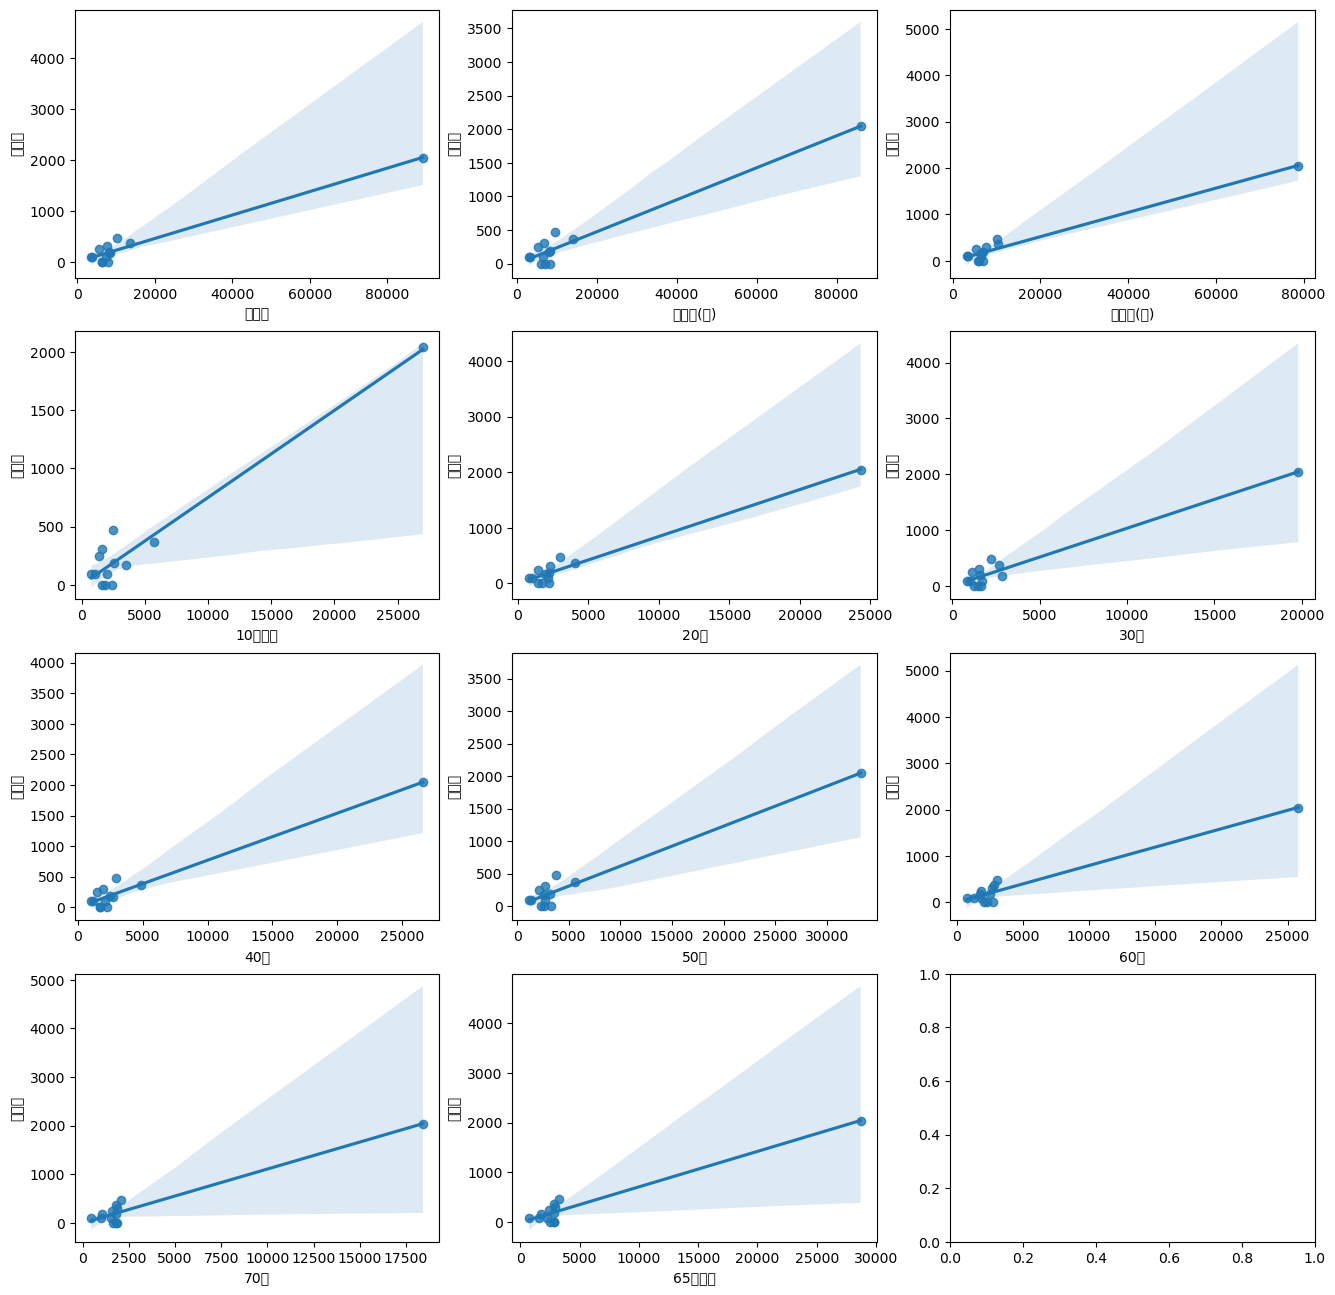

In [14]:
plt.show()

MSE : 58285.281, RMSE : 241.423
R^2(Variance score) : -20.702


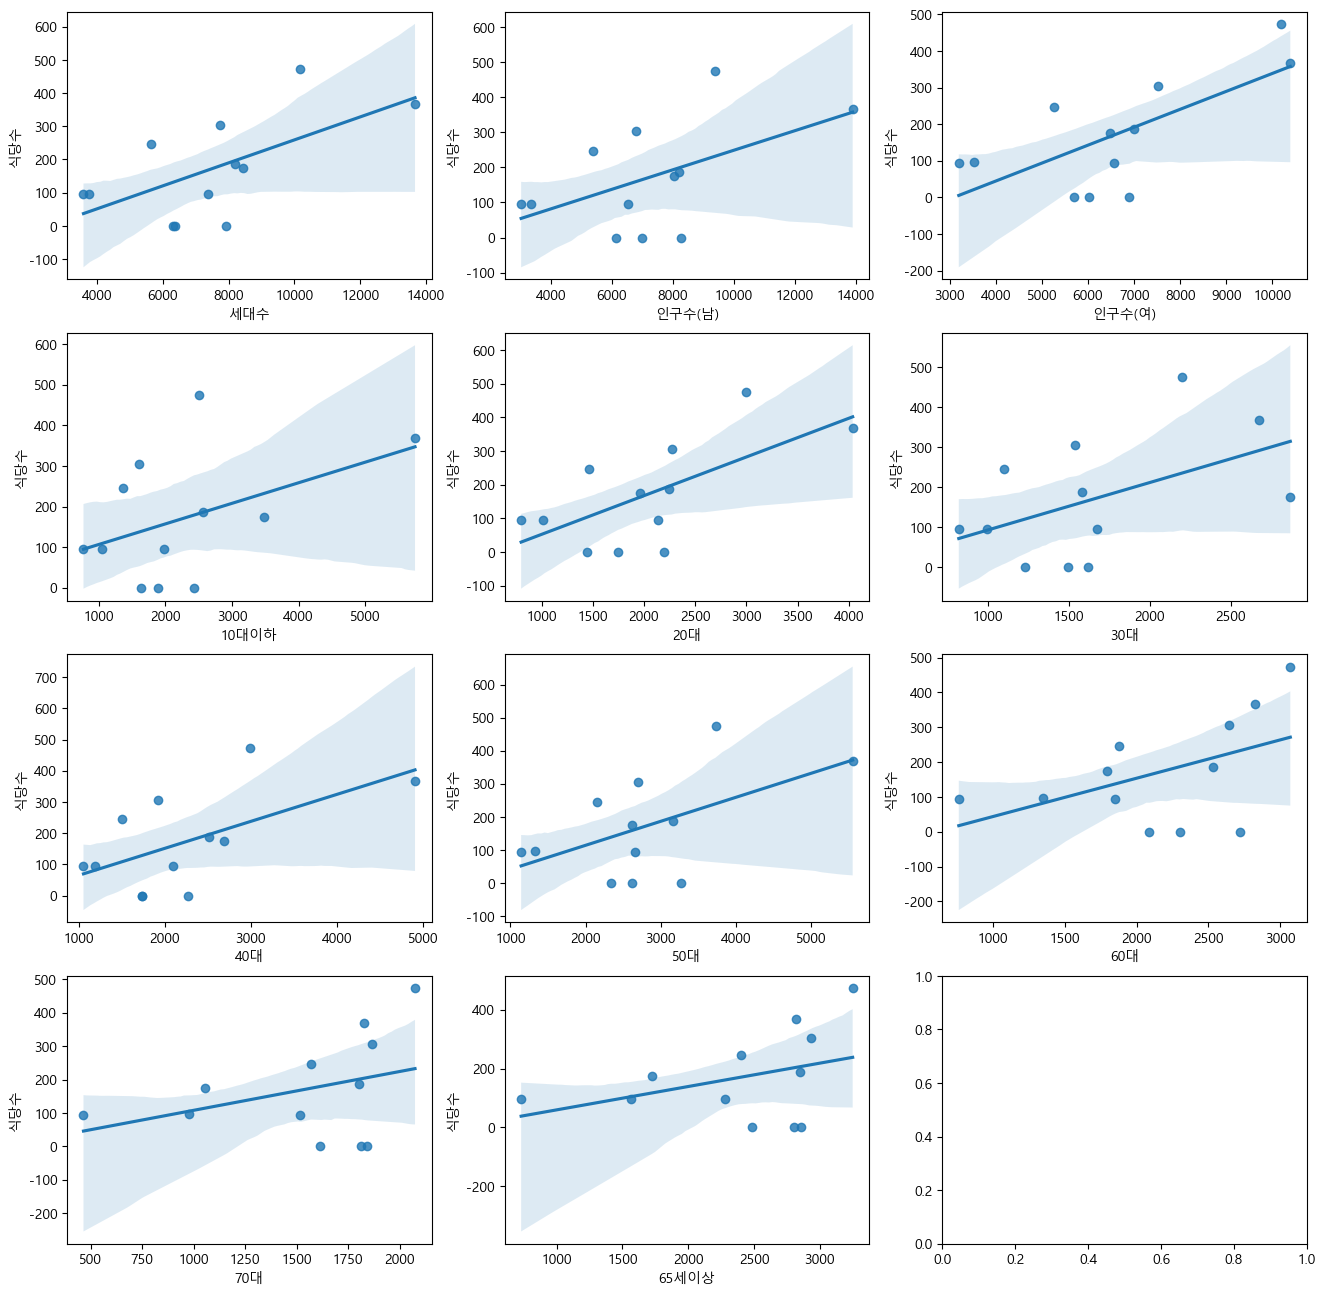

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#값이 많이 뛰는 구데이터가 있는 행을 삭제
people_df2=people_df.drop(index=0) 

#X,Y 분활하기
Y=people_df2['식당수']
X=people_df2.drop(['식당수'], axis=1,inplace=False)



#훈련용 데이터와 평가용 데이터 분활하기
X_trian, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=156)

#선형 회귀 분석: 모델 생성
lr=LinearRegression()
lr.fit(X_trian, Y_train)
Y_predict=lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

    
    
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 4)
x_features = ['세대수', '인구수(남)', '인구수(여)', '10대이하', '20대', '30대', '40대', '50대', '60대', '70대', '65세이상']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    plt.rc('font', family='Malgun Gothic')
    plt.rc('axes', unicode_minus=False)
    sns.regplot(x = feature, y = '식당수', data = people_df2, ax = axs[row][col])

plt.show()

In [16]:
restaurant_price_df = restaurant_price_df.drop(['조사기준','데이터기준일자'], axis = 1, inplace = False)

In [17]:
print(restaurant_price_df)

          품목     구평균가격       오정동      대화동       회덕동      비래동       송촌동  \
0        설렁탕    6800.0    6000.0      NaN       NaN      NaN    8000.0   
1         냉면    6850.0    8500.0   5000.0    7000.0   7000.0    8000.0   
2        비빔밥    6000.0    6000.0   6000.0       NaN      NaN    7000.0   
3        갈비탕    9400.0   10000.0   6000.0    9000.0  10000.0   12000.0   
4        삼계탕   11300.0   12000.0  10000.0   10000.0  12000.0   12000.0   
5     김치찌개백반    6200.0    6000.0   7000.0    6000.0   5000.0    7000.0   
6     된장찌개백반    6100.0    6000.0   6000.0    6000.0   5000.0    7000.0   
7        불고기   10940.0   12000.0      NaN       NaN  12000.0       NaN   
8         등심   29057.0   30000.0      NaN   25000.0  32000.0   20800.0   
9       돼지갈비   11178.0   12000.0   8000.0   12000.0  12000.0   13000.0   
10       삼겹살   11090.0   10000.0  11000.0   12000.0  12000.0   13000.0   
11       자장면    5150.0    6000.0   5000.0    5500.0   5000.0    5000.0   
12        짬뽕    6300.0    7000.0   650

In [18]:
restaurant_price_df = restaurant_price_df.dropna()
restaurant_price_df = restaurant_price_df.drop(['품목', '구평균가격'], axis = 1, inplace = False)

In [19]:

'''#인구수 추가
for i in range (0,11):
    list1 = [x_features[i]]
    list1 = list1 + people_df[x_features[i]].values.tolist()
    del(list1[i])
    
    #법1,2동의 평균 구하기
    temp1=list1[8]
    temp2= list1[9]
    list1[8]=((temp1+temp2)/2)
    del(list1[9])
    price_df = price_df.append(pd.Series(list1, index=restaurant_price_df.columns), ignore_index=True)'''

'\n#인구수 추가\nfor i in range (0,11):\n    list1 = [x_features[i]]\n    list1 = list1 + people_df[x_features[i]].values.tolist()\n    del(list1[i])\n    \n    #법1,2동의 평균 구하기\n    temp1=list1[8]\n    temp2= list1[9]\n    list1[8]=((temp1+temp2)/2)\n    del(list1[9])\n    price_df = price_df.append(pd.Series(list1, index=restaurant_price_df.columns), ignore_index=True)'

In [22]:
#법1,2동의 인구 구하기
list_pepole=people_df
list_pepole[8]=list_pepole[8]+ list_pepole[9]
del(list_pepole[9])


KeyError: 8

In [23]:
print(restaurant_price_df.transpose()) #행 열 바꾸기
restaurant_price_df=restaurant_price_df.transpose()
restaurant_price_df.append()

            1        3        4       5       6        10      11      12  \
오정동     8500.0  10000.0  12000.0  6000.0  6000.0  10000.0  6000.0  7000.0   
대화동     5000.0   6000.0  10000.0  7000.0  6000.0  11000.0  5000.0  6500.0   
회덕동     7000.0   9000.0  10000.0  6000.0  6000.0  12000.0  5500.0  6000.0   
비래동     7000.0  10000.0  12000.0  5000.0  5000.0  12000.0  5000.0  5500.0   
송촌동     8000.0  12000.0  12000.0  7000.0  7000.0  13000.0  5000.0  6000.0   
중리동     6000.0   8000.0  12000.0  6000.0  6000.0   7900.0  4000.0  5000.0   
법1,2동   6000.0   9000.0  10000.0  6000.0  6000.0  11000.0  5000.0  7000.0   
신탄진동    7000.0  10000.0  12000.0  6000.0  6000.0  12000.0  6000.0  7000.0   
석봉,목상동    7000    10000    11000    7000    7000    10000    4000    6000   
덕암동     7000.0  10000.0  12000.0  6000.0  6000.0  12000.0  6000.0  7000.0   

             13       16      20      21      25      26        27       28  \
오정동     19000.0  15000.0  3000.0  2500.0  6000.0  3000.0  139714.0   5000

TypeError: append() missing 1 required positional argument: 'other'

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X,Y 분활하기
Y=people_df['인구수(남)']
Y2=people_df['인구수(여)']
Y3=people_df['10대이하']
Y4=people_df['20대']
Y5=people_df['30대']
Y6=people_df['40대']
Y7=people_df['50대']
Y8=people_df['60대']
Y9=people_df['70대']
Y10=people_df['65세이상']

In [23]:
#훈련용 데이터와 평가용 데이터 분활하기
X_trian, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=156)

#선형 회귀 분석: 모델 생성
lr=LinearRegression()
lr.fit(X_trian, Y_train)
Y_predict=lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

    
    
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 4)
x_features = ['세대수', '인구수(남)', '인구수(여)', '10대이하', '20대', '30대', '40대', '50대', '60대', '70대', '65세이상']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    plt.rc('font', family='Malgun Gothic')
    plt.rc('axes', unicode_minus=False)
    sns.regplot(x = feature, y = '식당수', data = people_df2, ax = axs[row][col])

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [12, 13]